# Text Analysis Lesson

## Lesson Learning Outcome

* **The Text Analysis Lesson consists of one topic**
* By the end of this lesson, you should be able to:
  * Gather text data from Wikipedia
  * Create a WordCloud
  * Learn and use basic functionalities from Text Hero
  * Handle a DataFrame with Textual data

---

## Topic Objectives

  * Gather text data from Wikipedia
  * Create a WordCloud
  * Learn and use basic functionalities from Text Hero
  * Handle a DataFrame with Text data

Data Analytics also has incredible applications when dealing with text. As part of this process, you will have to learn more about the words that are most common for a given subset of your data.

Why do we study text analysis?

Because it allows you to analyse words present in different classes of textual data and it quickly reveals significant insights to your project

## Additional Learning Context

* We encourage you to:
  * Add **code cells and try out** other possibilities, e.g., playing around with parameter values in a function/method, considering additional function parameters, etc.
  * Also, **add your own comment** in the cells. It can help you to consolidate your learning. 


* Parameters in given function/method
  * As you may expect, a given function in a package may contain multiple parameters. 
  * Some are mandatory to declare, some have pre-defined values, and some are optional. We will cover the most common parameters used/employed in Data Analytics for a particular function/method. 
  * However, you may seek additional in the respective package documentation, where you will find instructions on how to use a given function/method. The studied packages are open source, so this documentation is public.

## Import Package for Learning

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text Analysis

There might come a moment in the workplace that your dataset may contain text, for example: a long description about a given group or a product review. We will learn how to:
* Collect data from Wikipedia articles
* Create WordCloud 
* Use a text processing library called TextHero
* Handle text data in DataFrames

## Wikipedia

Let's dive into the exciting world of web scraping with the Wikipedia library. Our first step is to install the `Wikipedia` library for this exercise.

We will use `wikipedia.page()` to request data. The argument is the Wikipedia article name. 
* In this case, we are requesting the content from "Python_(programming_language)"

In [105]:

import wikipedia
wiki_request = wikipedia.page('Python_(programming_language)')
wiki_request


<WikipediaPage 'Python (programming language)'>

You can access the attributes to choose your option

![alt text](image.png)

We are selecting `.content`, so we can access the article text

In [106]:
text = wiki_request.content
text

'Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Python is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming.\nGuido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language. Python 3.0, released in 2008, was a major revision and not completely backward-compatible with earlier versions. Beginning with Python 3.5, capabilities and keywords for typing were added to the language, allowing optional static typing. As of 2026, the Python Software Foundation supports Python 3.10, 3.11, 3.12, 3.13, and 3.14, following the project\'s annual release cycle and five-year support policy. Python 3.15 is currently in the alpha development phase, and the stable release is expected to come out in October 2026." Earlier version

Let's check the text length

In [107]:
len(text)

39317

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Ideally, we should preprocess the text data by removing stopwords (words that do not add much meaning to a sentence, like ‘We’, ‘are’ and ‘the’), empty blank space, punctuation, etc. 
We will leave that to the next section so we can focus on creating the WordCloud now.

### Additional Topics on wikipedia library

You may need more ideas for topics to search on Wikipedia. This is fine; use the method .random() on Wikipedia to get random article names. The argument is pages, and the number of random suggestions is limited to 10.

In [108]:
wikipedia.random(pages=10)

['Huawei Y5 (2017)',
 'Bubaqra Tower',
 'Scunthorpe Barbarians',
 'Rozdroże',
 'Wiffle ball',
 'Gate guardian',
 'Santa Maria delle Grazie Tower',
 'Zé Haroldo Cathedral',
 'Ricasetron',
 'Risto Hemmi']

You may also be interested in setting the language you want to have from the collected data. Use the method .set_lang() to change. The argument is prefix and is a 2-letter prefix. The options can be found here

In this case, we will select 'de' for German.

In [109]:
wikipedia.set_lang(prefix='de')

When we ran random suggestions for pages, we noticed only German pages are shown.

In [110]:
wikipedia.random(pages=10)

['Pont Jacques Chaban-Delmas',
 'Tino Navarro',
 'Leichtathletik-Europameisterschaften 2002/Dreisprung der Männer',
 'Duncan Wilson',
 'Kirchberg-Tunnel (Bahnstrecke München–Treuchtlingen)',
 '50 Cent',
 'Gottfried III. (Sponheim)',
 'Gersthofer',
 'Zencke',
 'Feind im Dunkel']

We are setting the language back to English

In [111]:
wikipedia.set_lang(prefix='en')

## WordCloud

We are now interested in plotting a WordCloud for `text` so we can learn the most frequent words shown in the WordCloud. The word size in the WordCloud reflects the word frequency in the text.

* First we install the wordcloud library Python package.

We will define a function to display the WordCloud.

It creates a figure and plots the word cloud image without a grid.

In [112]:
def plot_wordcloud(wordcloud):
    """
    Plots a word cloud using the given wordcloud object.

    Parameters:
    wordcloud (WordCloud): The word cloud object to be plotted.

    Returns:
    None
    """
    plt.figure(figsize=(15, 10))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()


We use the `WordCloud()` function, the documentation is found [here](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). The arguments we consider are:
* `width` and `height` to set the wordcloud plot
* `background_color`, options include 'white', 'black', 'navy', 'salmon' and others
* `collocations`, set to False to ensure that the word cloud doesn’t appear as if it contains any duplicate words
* `colormap`, follows matplotlib [palette](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
* `stopwords`, built-in stopwords removal capabilities from wordcloud 

Once we set `WordCloud()`, we chain the method `.generate()` to the text, and parse to `plot_wordcloud()`

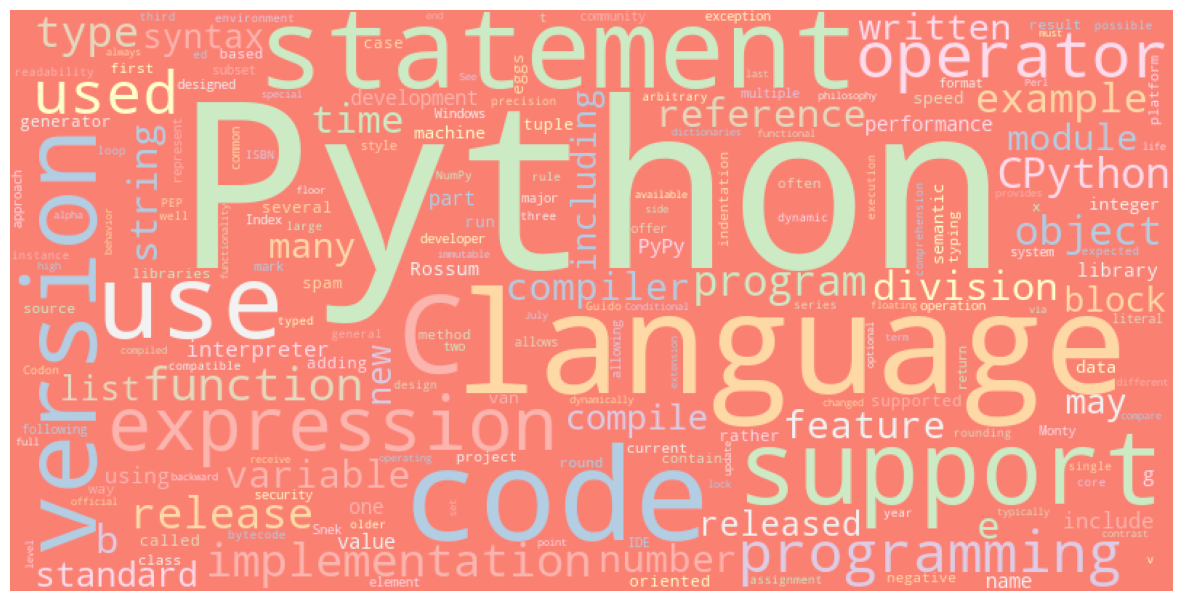

In [113]:

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text)

plot_wordcloud(wordcloud)


Now, we are interested in saving the WordCloud plot. We can use the method `.to_file()` over the variable that contains the wordcloud object. The argument is the path and filename

In [114]:
wordcloud.to_file("wordcloud.png")

We can check the image was saved by inspecting the files in the current directory. Note the file named wordcloud.png

In [115]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 7C17-6362

 Directory of c:\Users\ryan_\VS-code-projects\DA-Jupyter-Notebooks\Advanced Data Analysis Techniques

18/02/2026  13:05    <DIR>          .
18/02/2026  12:44    <DIR>          ..
18/02/2026  12:54            34,352 image.png
18/02/2026  13:24         1,130,868 TextAnalysis.ipynb
18/02/2026  13:57           153,966 wordcloud.png
               3 File(s)      1,319,186 bytes
               2 Dir(s)  584,213,970,944 bytes free


**PRACTICE:** Now, it is your turn to create a word cloud.

Choose an article from the list of articles below and create a wordcloud

In [116]:
wikipedia.random(pages=10)

['Bin Laden: The Man Who Declared War on America',
 'Claire Nitch',
 'Yu Yao-hsing',
 'Kungshög, Malmö',
 '2020 Coulson Aviation Lockheed EC-130 crash',
 '16 Air Assault Brigade',
 'Anton Rudinski',
 'William Grierson (footballer)',
 "Swimming at the 2004 Summer Paralympics – Men's 50 metre breaststroke SB3",
 'Indian Creek (Fall Creek tributary)']

In [117]:
# practice, get data from other wikipedia article article and do the same thing done so far

txt_practice = wikipedia.page('V.T. Subramania Pillai')
txt_practice

<WikipediaPage 'V.T. Subramania Pillai'>

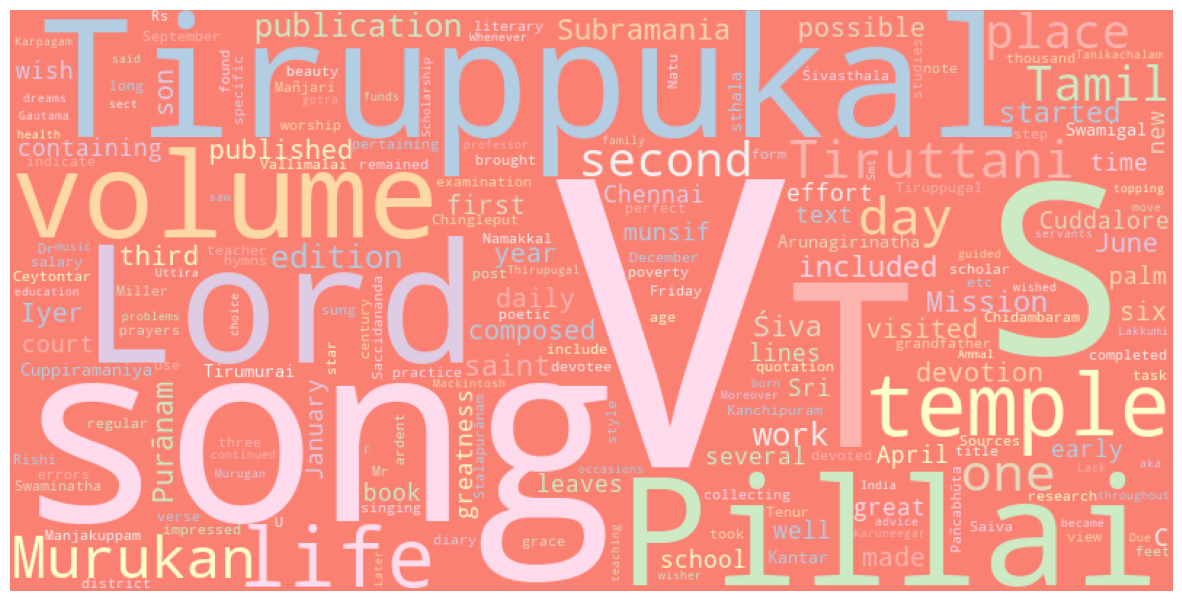

In [118]:
txt = txt_practice.content
wordcloud2 = WordCloud(
    width=800,
    height=400,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(txt)

plot_wordcloud(wordcloud2)

#from wiki page object, use .content to get usaable text data, then use that text data to create a wordcloud and plot it.
#
#

# Text Analysis: WordCloud + Most Frequent Words (without texthero)

This notebook covers:
- Getting text data (Wikipedia example)
- Cleaning / preprocessing text (lowercase, remove digits, punctuation, diacritics, stopwords, extra whitespace)
- Creating a WordCloud
- Plotting the most frequent words
- Applying the same workflow to tabular text data (IMDb reviews)
- Comparing cohorts (sentiment 0 vs 1)

We replace `texthero` with `scikit-learn`'s `CountVectorizer`.


In [119]:
# If you need installs in your environment, uncomment:
# !pip install wordcloud scikit-learn seaborn pandas matplotlib numpy requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import requests


## Helper functions

We create:
- `fetch_wikipedia_page_content()` to get Wikipedia page text (no extra wikipedia package needed)
- `clean_text_series()` to replicate the idea of `hero.clean()`
- `top_words()` to replicate the idea of `hero.top_words()`
- `plot_wordcloud()` to display the WordCloud


In [120]:
# --- Fetch Wikipedia content (plain text) ---
def fetch_wikipedia_page_content(title: str) -> str:
    """
    Fetch plain-text Wikipedia page content using the MediaWiki API.
    """
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "extracts",
        "explaintext": 1,     # plain text (no HTML)
        "titles": title,
        "format": "json",
        "redirects": 1
    }
    r = requests.get(url, params=params, timeout=30)
    r.raise_for_status()
    data = r.json()

    pages = data.get("query", {}).get("pages", {})
    page = next(iter(pages.values()), {})
    extract = page.get("extract", "")
    return extract


# --- Text cleaning via CountVectorizer analyzer ---
# This approximates hero.clean():
# - lowercase
# - remove digits (token pattern keeps letters only)
# - remove punctuation (token pattern)
# - remove diacritics (strip_accents)
# - remove stopwords
# - normalize whitespace (join tokens back)
VEC_KWARGS = dict(
    lowercase=True,
    strip_accents="unicode",
    stop_words="english",
    token_pattern=r"(?u)\b[a-zA-Z]+\b"  # keep alphabetic tokens only
)

_ANALYZER = CountVectorizer(**VEC_KWARGS).build_analyzer()

def clean_text_series(s: pd.Series) -> pd.Series:
    """
    Clean a Pandas Series of text and return a cleaned Series of strings.
    """
    s = s.fillna("").astype(str)
    return s.apply(lambda x: " ".join(_ANALYZER(x)))


def top_words(series_or_text, n=10) -> pd.Series:
    """
    Return top-n most frequent words from:
    - a string
    - a list/array of strings
    - a Pandas Series of strings
    """
    if isinstance(series_or_text, str):
        corpus = [series_or_text]
    elif isinstance(series_or_text, (list, tuple, np.ndarray)):
        corpus = [str(x) for x in series_or_text]
    else:
        corpus = pd.Series(series_or_text).fillna("").astype(str).tolist()

    vec = CountVectorizer(**VEC_KWARGS)
    X = vec.fit_transform(corpus)
    counts = np.asarray(X.sum(axis=0)).ravel()
    words = vec.get_feature_names_out()

    return pd.Series(counts, index=words).sort_values(ascending=False).head(n)


def plot_wordcloud(wordcloud: WordCloud) -> None:
    plt.figure(figsize=(15, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


## Wikipedia example

We'll grab the IPython Wikipedia page text, check its length, clean it, then create:
- a WordCloud
- a "top words" bar plot


In [121]:

txt = wikipedia.page('IPython')
txt # preview

<WikipediaPage 'IPython'>

In [122]:
txt_content = txt.content

In [123]:
print("Original length (characters):", len(txt_content))


Original length (characters): 5205


### Clean the text

In the original notebook, `hero.clean()` needed a Pandas Series.

We'll do the same:
- convert to Series
- clean using `clean_text_series()`
- take [0] to get back a single string


In [124]:
txt_ser = pd.Series([txt_content])
txt_clean = clean_text_series(txt_ser)[0]
txt_clean[:500]


'ipython interactive python command shell interactive computing multiple programming languages originally developed python programming language offers introspection rich media shell syntax tab completion history ipython provides following features interactive shells terminal qt based browser based notebook interface support code text mathematical expressions inline plots media support interactive data visualization use gui toolkits flexible embeddable interpreters load s projects tools parallel c'

In [125]:
print("Cleaned length (characters):", len(txt_clean))


Cleaned length (characters): 3850


### Create a WordCloud


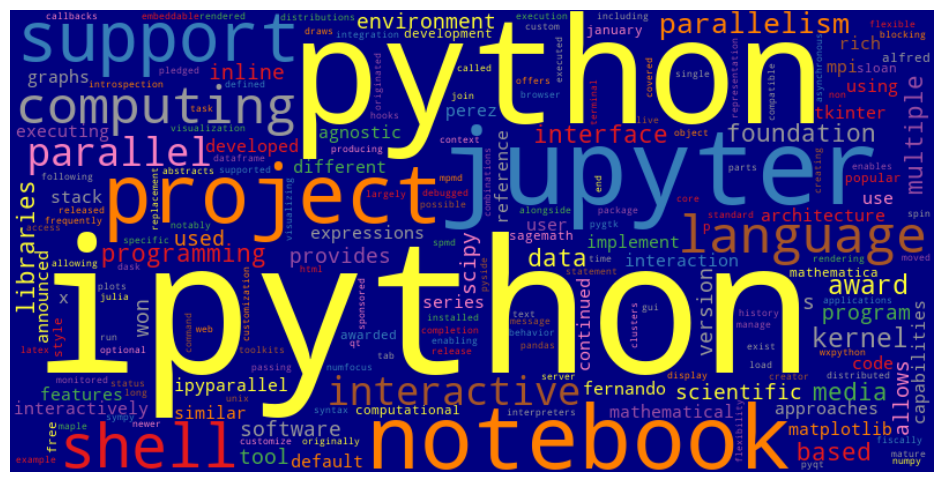

In [126]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="navy",
    colormap="Set1",
    collocations=False,
    stopwords=STOPWORDS,
).generate(txt_clean)

plot_wordcloud(wordcloud)


### Count and plot the most frequent words


In [127]:
sns.set_style("whitegrid")

num_top_words = 10
top = top_words(txt_clean, n=num_top_words)
top


ipython        29
python         17
jupyter        15
notebook        9
support         8
project         8
computing       7
interactive     6
parallelism     6
parallel        6
dtype: int64

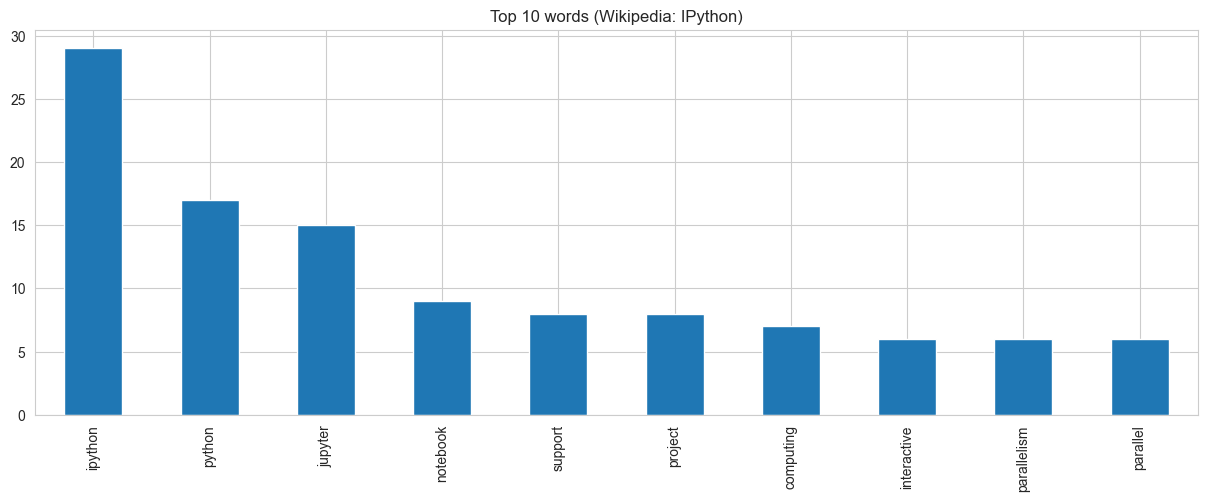

In [128]:
plt.figure(figsize=(15, 5))
top.plot(kind="bar")
plt.title(f"Top {num_top_words} words (Wikipedia: IPython)")
plt.show()


## IMDb Reviews dataset (tabular text)

We load a dataset of movie reviews with a binary sentiment label:
- 0 = negative
- 1 = positive

Then we:
- clean `review`
- create WordCloud + top words for negative sentiment
- handle HTML-ish tokens (e.g., 'br')


In [129]:
df = pd.read_csv("https://raw.githubusercontent.com/Code-Institute-Solutions/sample-datasets/main/imdb_reviews.csv")
df = df.sample(n=1000, random_state=1).reset_index(drop=True)

print(df.shape)
df.head()


(1000, 2)


,review,sentiment
0,A response to previous comments made by reside...,0
1,Hellraiser: Bloodline is where the sequel medi...,0
2,American Pie: Beta House is sort of in limbo b...,0
3,'The Shop Around the Corner (1940)' is a pleas...,1
4,"A friend of mine once rented this, thinking si...",0


### Clean the review text (replacement for `hero.clean(df['review'])`)


In [130]:
df["review"] = clean_text_series(df["review"])
df.head()


,review,sentiment
0,response previous comments residents region mo...,0
1,hellraiser bloodline sequel mediocrity hellrai...,0
2,american pie beta house sort limbo genres hand...,0
3,shop corner pleasant romantic comedy sort hold...,1
4,friend rented thinking peter fonda starred cou...,0


### WordCloud for negative sentiment (sentiment == 0)

We subset negative reviews and combine them into one big string.


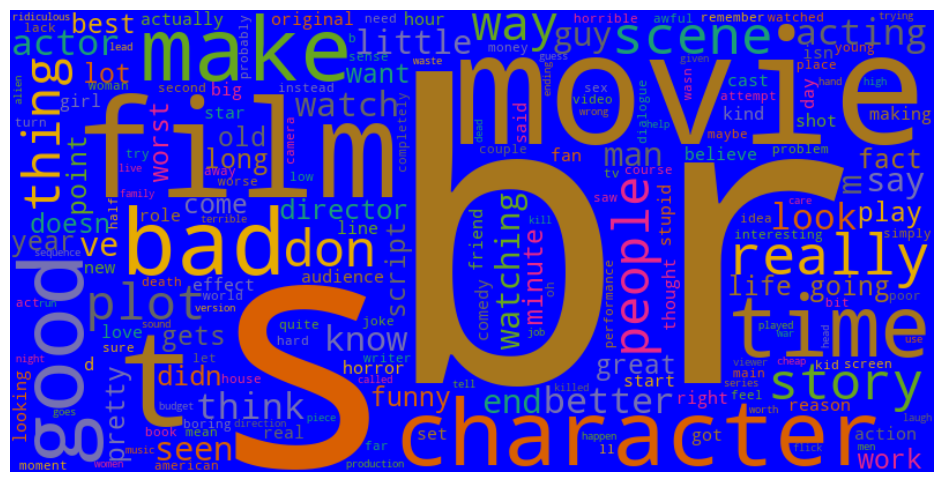

In [131]:
text_neg = " ".join(df.query("sentiment == 0")["review"].tolist())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="blue",
    colormap="Dark2",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text_neg)

plot_wordcloud(wordcloud)


### Top words plot (negative sentiment)


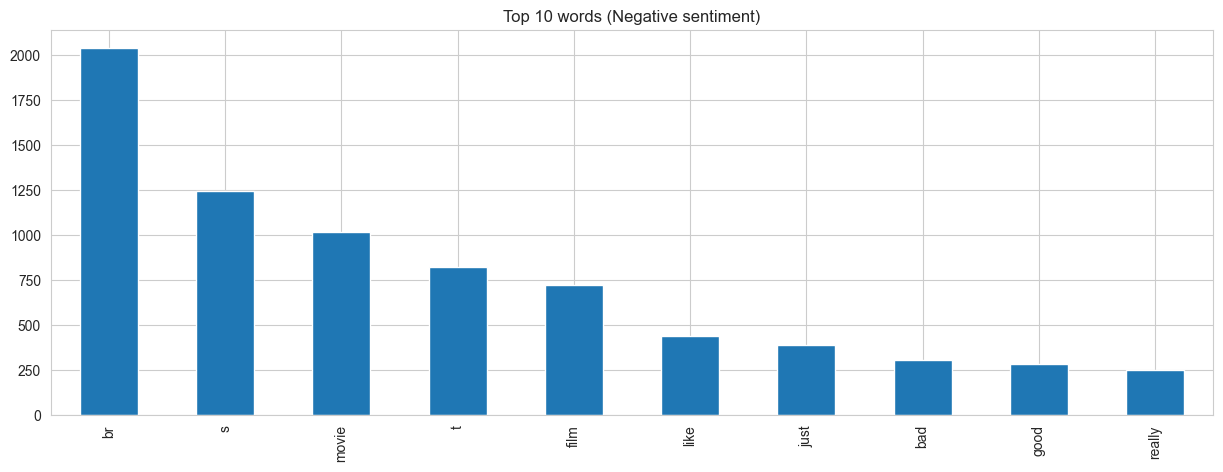

In [132]:
sns.set_style("whitegrid")

num_top_words = 10
top_neg = top_words(text_neg, n=num_top_words)

plt.figure(figsize=(15, 5))
top_neg.plot(kind="bar")
plt.title(f"Top {num_top_words} words (Negative sentiment)")
plt.show()


## Removing specific characters/tokens

Sometimes 'br' appears frequently due to HTML line breaks in review text.
We'll remove common patterns like:
['\n','/><br','<br', 'br', '/><br', '/>']


In [133]:
def remove_specific_characters(txt: str) -> str:
    """
    Removes specific characters/patterns from the given text.
    """
    for x in ["\n", "/><br", "<br", "br", "/><br", "/>"]:
        txt = txt.replace(x, " ")
    return txt


### Rebuild the negative text, remove tokens, then re-run WordCloud + top words


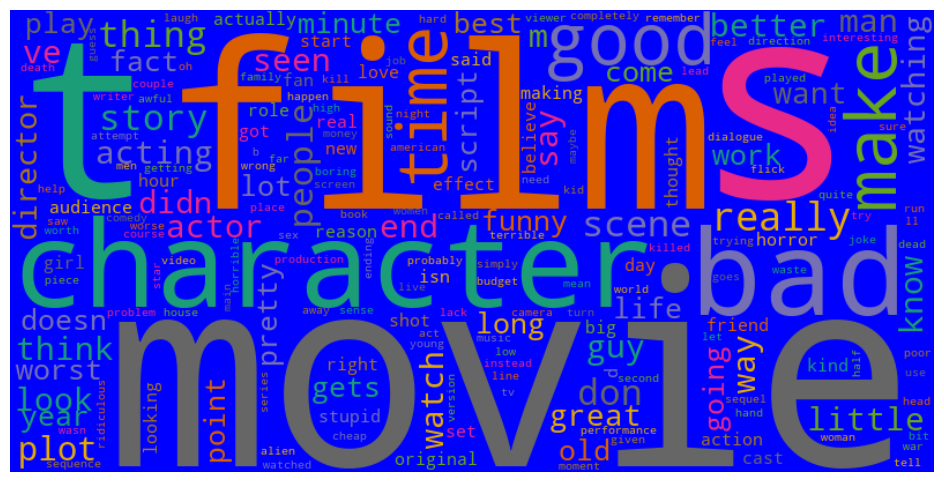

In [134]:
text_neg_raw = str(df.query("sentiment == 0")["review"].values)
text_neg_cleaned = remove_specific_characters(text_neg_raw)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="blue",
    colormap="Dark2",
    collocations=False,
    stopwords=STOPWORDS,
).generate(text_neg_cleaned)

plot_wordcloud(wordcloud)


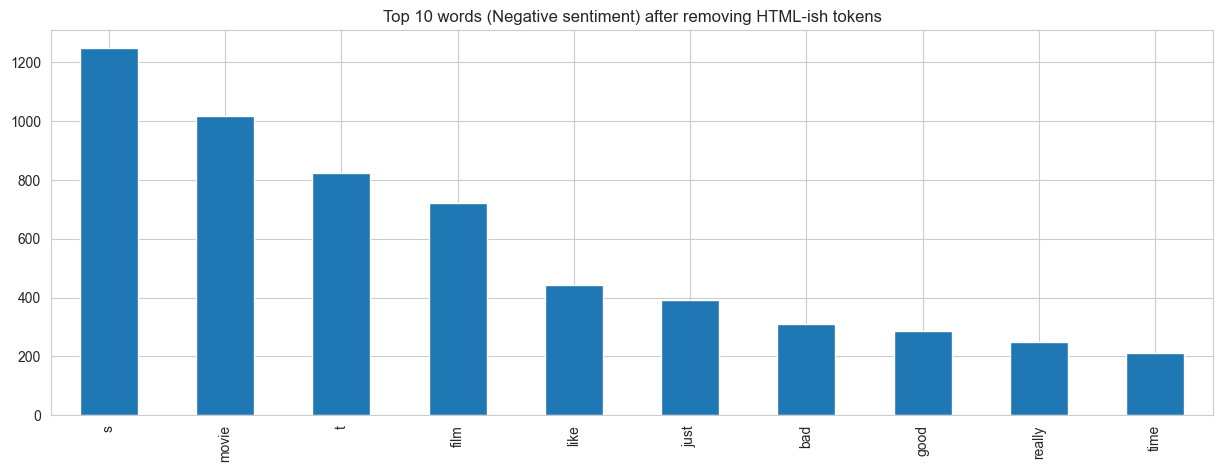

In [135]:
top_neg2 = top_words(text_neg_cleaned, n=10)

plt.figure(figsize=(15, 5))
top_neg2.plot(kind="bar")
plt.title("Top 10 words (Negative sentiment) after removing HTML-ish tokens")
plt.show()


## Cohort wordplots (sentiment 0 vs 1)

We’ll build:
- `plot_top_words()`
- `wordplot_from_data_frame()`

This generates a WordCloud + top words bar plot for each cohort level.


In [136]:
def plot_top_words(text: str, num_top_words: int = 10) -> None:
    """
    Plots the top words in the given text using a bar chart.
    """
    sns.set_style("whitegrid")
    top = top_words(text, n=num_top_words)

    plt.figure(figsize=(15, 5))
    top.plot(kind="bar")
    plt.title(f"Top {num_top_words} words")
    plt.show()


def wordplot_from_data_frame(df: pd.DataFrame, cohort_variable: str, text_variable: str) -> None:
    """
    Generate WordCloud and Top Words bar plot for each cohort in a dataframe.
    """
    cohort_levels = df[cohort_variable].unique()

    for level in cohort_levels:
        text = df.loc[df[cohort_variable] == level, text_variable].values
        text = str(text)
        text = remove_specific_characters(text)

        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="navy",
            colormap="Dark2",
            collocations=False,
            stopwords=STOPWORDS,
        ).generate(text)

        print(f"=== {cohort_variable} : {level} ===")
        plot_wordcloud(wordcloud)
        print()
        plot_top_words(text, num_top_words=10)
        print("\n\n")


### Run the cohort comparison (sentiment 0 vs 1)


=== sentiment : 0 ===


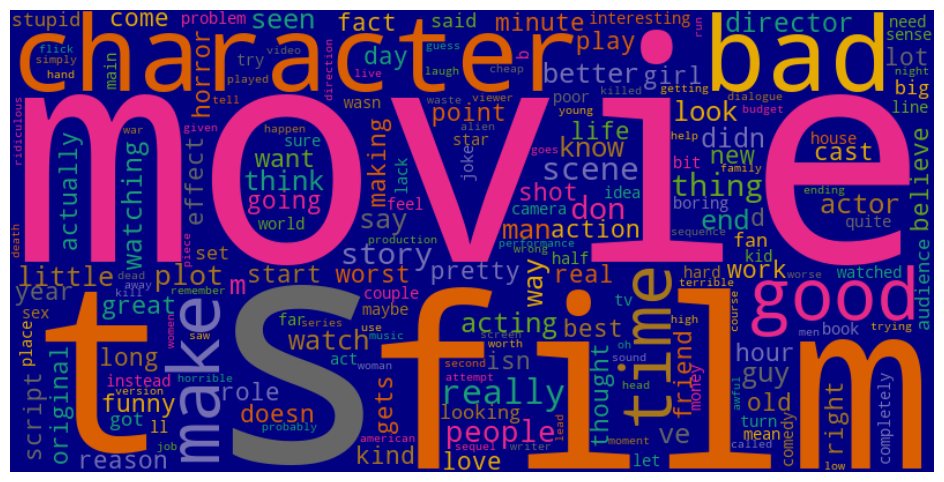

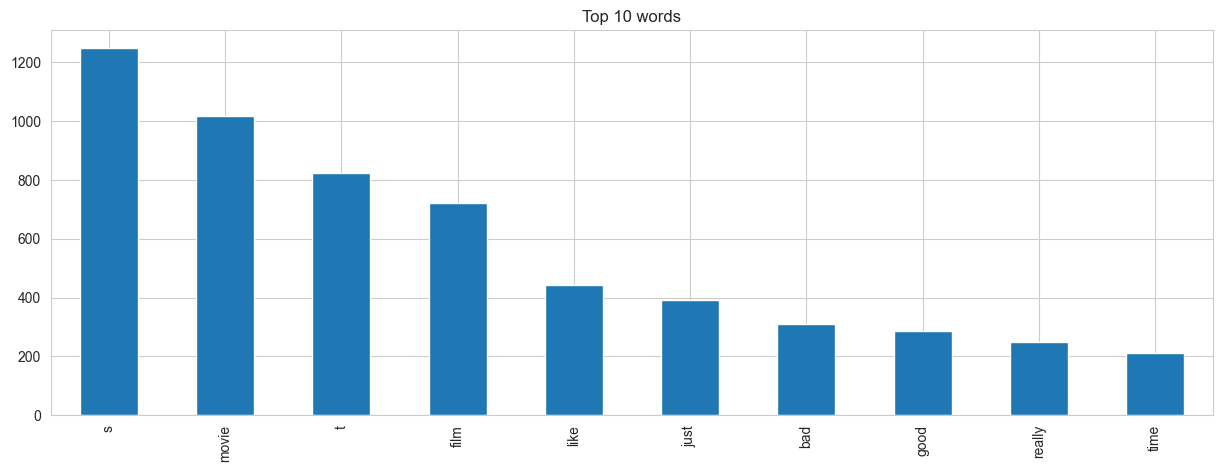




=== sentiment : 1 ===


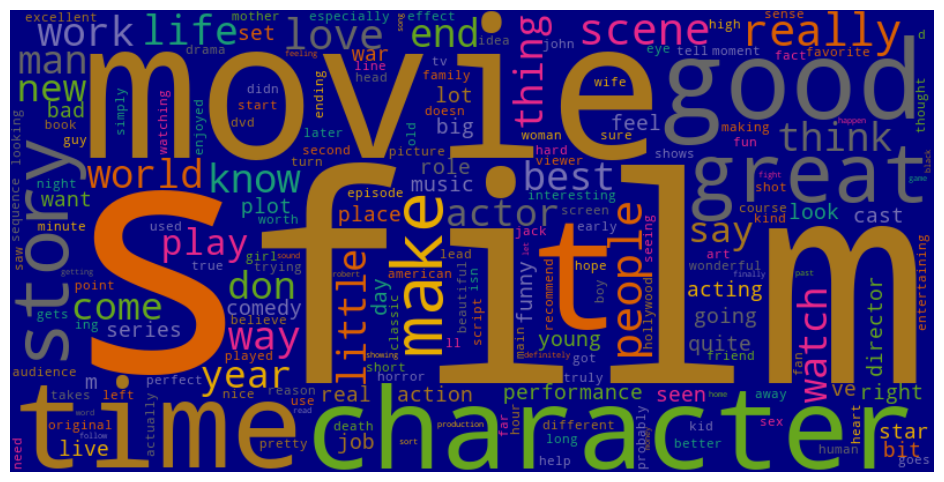

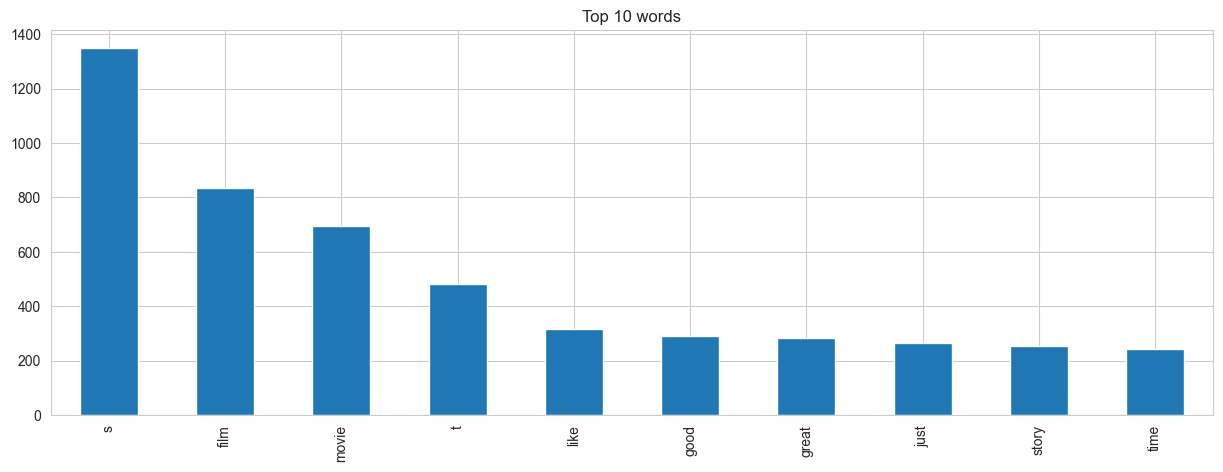

In [137]:
wordplot_from_data_frame(df, cohort_variable="sentiment", text_variable="review")
